In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from scipy.spatial import distance #só pra testar a distancia

In [16]:
mapa = pd.read_csv("data-base.csv") #LENDO O DATASET USANDO O PANDAS
mapa.columns


Index(['Timestamp', 'totalLifeLost', 'playerLevel', 'timeSpent', 'steps',
       'deaths', 'precision', 'percentKills', 'percentItems',
       'percentAmmoPickUp', 'interactions', 'percentQuests', 'playthroughs',
       'victory', 'foundSecret', 'finalPosition', 'width', 'height', 'Smooth',
       'MinRegionSize', 'RandomFillPercent', 'minEnemyDistance',
       'minItemDistance', 'averageEnemyDistance', 'averageItemDistance',
       'EnemyDensity', 'ItemDensity', 'MaxEnemies', 'MaxItems',
       'GeneratedEnemies', 'GeneratedItems', 'startingPosition',
       'exitDoorPosition', 'itemPositions', 'enemyPositions', 'seed',
       'mapSize', 'complexity', 'enemyAmount', 'enemyDensity',
       'interactionAmount', 'conversationMaterial', 'difficulty', 'fun'],
      dtype='object')

In [3]:
mapa['fun'].value_counts()

0    79
3    44
2    39
4    26
1    25
Name: fun, dtype: int64

In [4]:
mapa['fun'].describe()

count    213.000000
mean       1.591549
std        1.462527
min        0.000000
25%        0.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: fun, dtype: float64

In [5]:
mapa.loc[mapa['fun']< 2 , 'fun'] = 0    #BASEADO NA MEDIANA ACIMA, SE A NOTA DADA AO FUN FOR MENOR QUE 2, ENTÃO RECEBE 0
mapa.loc[mapa['fun']>= 2 ,'fun'] = 1    #SE NÃO, RECEBE 1

mapa["fun"].unique()

array([0, 1], dtype=int64)

In [6]:
#test_column = mapa[["timeSpent","percentKills","mapSize","enemyAmount","enemyDensity","interactionAmount","conversationMaterial",
#                    "difficulty","percentItems","totalLifeLost","seed", "fun"]]
#conjunto de dados 1

In [17]:
test_2 = mapa[["totalLifeLost","timeSpent","playthroughs", "deaths", "steps","seed", "fun"]]

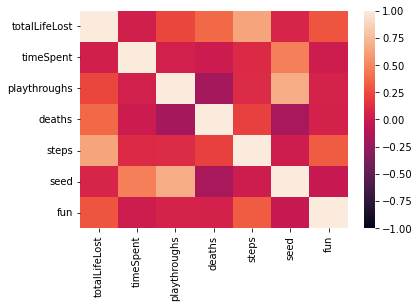

In [18]:
sns.heatmap(test_2.corr(), annot=False, vmin=-1, vmax = 1)
plt.show()

In [7]:
test_column = mapa[["timeSpent","percentKills","mapSize","enemyAmount","enemyDensity","interactionAmount","conversationMaterial",
                    "difficulty","percentItems","totalLifeLost","seed", "fun"]]

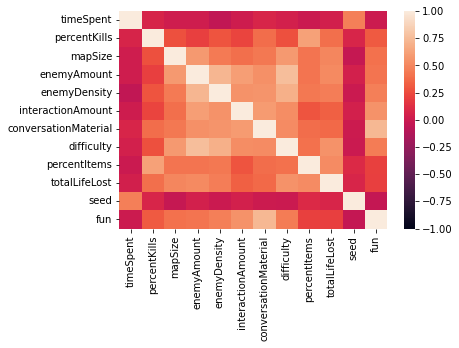

In [8]:
sns.heatmap(test_column.corr(), annot=False, vmin=-1, vmax = 1)
plt.show()

In [9]:
#SÓ TESTANDO O PLOT DOS MAPAS, CRIAREI NOVOS DEPOIS

In [10]:
seed = (test_column['seed'])
X = (test_column.drop(['seed','fun'],1)) #PARA O TESTES E TESTES, USEI TODAS A COLUNAS MENOS A FUN
y = (test_column['fun'])          #PARA O TARGET, SOMENTE A COLUNA FUN FOI USADA


C:\Users\nidal\AppData\Local\Temp/ipykernel_7132/3975680701.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = (test_column.drop(['seed','fun'],1)) #PARA O TESTES E TESTES, USEI TODAS A COLUNAS MENOS A FUN


In [27]:
X


,timeSpent,percentKills,mapSize,enemyAmount,enemyDensity,interactionAmount,conversationMaterial,difficulty,percentItems,totalLifeLost
0,8,0.076923,0,0,0,0,0,0,0.142857,0
1,14,0.000000,0,0,0,0,0,0,0.000000,10
2,76,0.384615,2,1,3,0,0,0,1.000000,30
3,45,0.000000,2,2,3,2,3,3,0.555556,35
4,52,0.105263,2,3,3,1,0,3,0.500000,75
...,...,...,...,...,...,...,...,...,...,...
208,4,0.000000,0,0,0,0,0,0,0.000000,20
209,35,0.000000,0,0,0,0,0,0,0.000000,0
210,8,0.000000,0,0,0,0,0,0,0.000000,0
211,20,0.052632,2,0,0,1,0,0,0.000000,20


In [32]:
X_train,X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 0,shuffle=False) 
#SEPARANDO O DATASET EM TREINO E TESTE, ONDE 20% DO DATASET REPRESENTAM O TESTES, E 80% PARA TREINO

In [13]:
mapa[["timeSpent","percentKills","mapSize","enemyAmount","enemyDensity","interactionAmount","conversationMaterial",
                    "difficulty","percentItems","totalLifeLost","seed", "fun"]].iloc[[148]]


,timeSpent,percentKills,mapSize,enemyAmount,enemyDensity,interactionAmount,conversationMaterial,difficulty,percentItems,totalLifeLost,seed,fun
148,126,0.263158,2,1,1,2,4,1,0.375,45,95.9531,1


In [34]:
X_test

,timeSpent,percentKills,mapSize,enemyAmount,enemyDensity,interactionAmount,conversationMaterial,difficulty,percentItems,totalLifeLost
170,44,0.052632,0,0,0,0,0,0,0.181818,5
171,185,0.157895,0,0,0,0,0,0,0.555556,30
172,50,0.368421,0,0,0,0,0,0,0.400000,20
173,50,0.052632,0,0,0,0,0,0,0.090909,20
174,322,0.368421,0,2,3,2,3,2,0.250000,15
175,1722,0.473684,3,3,1,3,4,3,0.454545,60
176,89,0.052632,2,3,1,2,1,2,0.555556,5
177,566,0.368421,1,1,2,1,3,1,0.444444,85
178,74,0.210526,0,3,2,3,1,2,0.500000,35
179,113,0.368421,0,0,0,0,0,0,0.400000,35


In [36]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)    #DANDO UM FIT NOS DADOS DE TREINO E TESTE
X_test = sc_X.transform(X_test)

In [37]:
X_test

array([[-0.35378025, -1.0267058 , -1.2184914 , -1.30234256, -1.23867455,
        -1.32858381, -1.40490285, -1.09658747, -1.31371311, -1.27312037],
       [ 0.48791827, -0.65687737, -1.2184914 , -1.30234256, -1.23867455,
        -1.32858381, -1.40490285, -1.09658747,  0.05341938, -0.66856601],
       [-0.31796329,  0.08277971, -1.2184914 , -1.30234256, -1.23867455,
        -1.32858381, -1.40490285, -1.09658747, -0.51560345, -0.91038775],
       [-0.31796329, -1.0267058 , -1.2184914 , -1.30234256, -1.23867455,
        -1.32858381, -1.40490285, -1.09658747, -1.64625889, -0.91038775],
       [ 1.30573883,  0.08277971, -1.2184914 ,  0.31370295,  1.40452219,
         0.72468208,  0.75975109,  0.48996461, -1.06430388, -1.03129863],
       [ 9.66302916,  0.45260842,  0.96964457,  1.12172571, -0.35760897,
         1.75131502,  1.4813024 ,  1.28324066, -0.31607586,  0.05689923],
       [-0.08515306, -1.0267058 ,  0.24026591,  1.12172571, -0.35760897,
         0.72468208, -0.68335153,  0.48996461

In [15]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean') #APLICANDO O KNN

In [16]:
clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [17]:
accuracy = clf.score(X_test, y_test) #ACURÁCIA DO MODELO, ATUALMENTE EM 72%
accuracy


0.5348837209302325

In [18]:
test_column.head(4) #SÓ SERVE DE AUXILIO PARA EU VER QUAIS ENTRADAS USAR

,timeSpent,percentKills,mapSize,enemyAmount,enemyDensity,interactionAmount,conversationMaterial,difficulty,percentItems,totalLifeLost,seed,fun
0,8,0.076923,0,0,0,0,0,0,0.142857,0,1.044352,0
1,14,0.000000,0,0,0,0,0,0,0.000000,10,0.000000,0
2,76,0.384615,2,1,3,0,0,0,1.000000,30,24.722800,0
3,45,0.000000,2,2,3,2,3,3,0.555556,35,7.503700,1


In [19]:
exemplo = np.array([81.96,0.09090909,4,1,1,2,4,2,0.3333333,25]) #ENTRADA TESTE49.14	0.4666667	2	2	2	3	4	2	0.375	15
exemplo = exemplo.reshape(1,-1)     # COLOCANDO TODOS OS VALORES ENTRE -1 E 149.14,0.4666667,2,2,2,3,4,2,0.375,15
exemplo = sc_X.transform(exemplo)   # TRANSFORMANDO TODOS ESSES DADOS PARA UMA MESMA MÉTRICA
predict = clf.kneighbors(exemplo, 3)


#exemplo = np.array([41.3,0.3571429,3,3,4,4,3,3,0.2857143,20])    

print("Indices dos mapas: ", predict)
#print(type(predict.tolist())) #CASO SEJA NECESSÁRIO TROCAR O TIPO DESSA CARALHA
 



Indices dos mapas:  (array([[1.85735078, 1.8590083 , 1.93900729]]), array([[148,   6,  11]], dtype=int64))


C:\Users\nidal\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [20]:
joblib.dump(clf,"knnmodelTESTE.joblib")

['knnmodelTESTE.joblib']

In [21]:
#PARA REFERENCIA!!

#def seedMapas():
  #  Mapas=[]
#    for i in predict:
#        for j in i:
#            Mapas.append(j)  
#    index_mapas = X_train.iloc[Mapas]
#    final_result = index_mapas.merge(seed, left_index=True, right_index=True)
#    return final_result['seed']

#print(seedMapas())